In [55]:
from find_binaries import get_energies_from_particles
from find_binaries import find_bound_relations
from cluster_trial_final import particle_set
from interaction import bbh_orbit
import math
from amuse.lab import *

In [86]:
gc6_200k = read_set_from_file('./Text/Cluster_Trials/6pc/3000kms2Myr_end.hdf5', format='hdf5')
#particles_test = read_set_from_file('./Text/Cluster_Trials/1pc/3000kms200kyr_end.hdf5', format='hdf5')
#for part in particles_test:
#    rel_dist = 
bbh_mass = 7e9 | units.MSun
mass_ratio = 0.25
bbh_separation = 1.7 | units.parsec
bbh_phase = 4.61
bound_count = 0
for part in gc6_200k:
    pos = math.sqrt((part.x.value_in(units.km)**2) + 
                    (part.y.value_in(units.km)**2) + 
                    (part.z.value_in(units.km)**2)) | (units.km)
    vel = math.sqrt((part.velocity.x.value_in(units.kms)**2) + 
                    (part.velocity.y.value_in(units.kms)**2) + 
                    (part.velocity.z.value_in(units.kms)**2)) | units.kms
    
    KE = 0.5*vel**2
    PE = (constants.G*bbh_mass)/pos
    if PE > KE:
        bound_count += 1
    else:
        continue
print bound_count

#bbh_particles = particle_set(bbh_mass, mass_ratio, bbh_separation, bbh_phase)
bbh_particle = Particles(1)
bbh_particle.mass = bbh_mass
bbh_particle.position = (0, 0, 0) | units.parsec

gc6_200k.add_particles(bbh_particle)

TE, rel_pke, pu = get_energies_from_particles(gc6_200k, pm=None, pv=None, pp=None)



140
Number of stars = 1001
Max total energy = 2.39425691907e+54
Min total energy = -9.92102397292e+53


In [64]:
mul_im_bnd_to, mul_bnd_to_me, mutally_bnd = find_bound_relations(TE)
print mul_im_bnd_to

{0: array([1000]), 2: array([1000]), 3: array([1000]), 4: array([1000]), 5: array([1000]), 6: array([1000]), 7: array([1000]), 9: array([1000]), 10: array([1000]), 11: array([1000]), 12: array([1000]), 13: array([1000]), 14: array([1000]), 15: array([1000]), 16: array([1000]), 17: array([1000]), 18: array([1000]), 19: array([1000]), 21: array([1000]), 22: array([1000]), 23: array([1000]), 24: array([1000]), 25: array([1000]), 26: array([1000]), 27: array([1000]), 28: array([1000]), 29: array([1000]), 30: array([1000]), 31: array([1000]), 32: array([1000]), 33: array([1000]), 34: array([1000]), 35: array([1000]), 36: array([1000]), 37: array([1000]), 38: array([1000,  319]), 39: array([1000]), 40: array([1000]), 43: array([1000]), 44: array([1000]), 46: array([1000]), 48: array([1000]), 49: array([1000]), 50: array([1000]), 51: array([1000]), 52: array([1000]), 53: array([1000]), 54: array([1000]), 55: array([1000]), 56: array([1000]), 58: array([1000]), 60: array([1000]), 61: array([10

In [65]:
len(mul_bnd_to_me[1000])


843

In [51]:
len(mul_bnd_to_me[1001])

1001

In [145]:
import matplotlib.pyplot as plt
import numpy as np
bbh_mass = 7e9 | units.MSun
mass_ratio = 0.25
bbh_separation = 1.7 | units.parsec
bbh_phase = 4.61

gc6_file_list = ['3000kms200kyr_end.hdf5', '3000kms1Myr_end.hdf5', '3000kms2Myr_end.hdf5', '3000kms2Gyr_end.hdf5']
time = [0, .2, 1, 2, 2000]
pc6_bound_count = [1000]
particle_energy = []
for part_list in gc6_file_list:
    particles = read_set_from_file('./Text/Cluster_Trials/6pc/'+part_list, format='hdf5')
    bound = 0
    for part in particles:
        pos = math.sqrt((part.x.value_in(units.km)**2) + 
                    (part.y.value_in(units.km)**2) + 
                    (part.z.value_in(units.km)**2)) | (units.km)
        vel = math.sqrt((part.velocity.x.value_in(units.kms)**2) + 
                    (part.velocity.y.value_in(units.kms)**2) + 
                    (part.velocity.z.value_in(units.kms)**2)) | units.kms
    
        KE = 0.5*vel**2
        PE = (constants.G*bbh_mass)/pos
        #if len(particle_energy) < 1000:
            #particle_energy.append(((PE-KE)*(1e4 | units.MSun)).value_in(units.J))
        #else:
            #continue
        if PE > KE:
            bound += 1
        else:
            continue
    pc6_bound_count.append(bound)
#print particle_energy

gc1_file_list = ['3000kms200kyr_end.hdf5', '3000kms1Myr_end.hdf5', '3000kms2Myr_end.hdf5', '3000kms2Gyr_end.hdf5']
time = [0.02, .2, 1, 2, 2000]
pc1_bound_count = [1000]
for part_list in gc1_file_list:
    particles = read_set_from_file('./Text/Cluster_Trials/1pc/'+part_list, format='hdf5')
    bound = 0
    for part in particles:
        pos = math.sqrt((part.x.value_in(units.km)**2) + 
                    (part.y.value_in(units.km)**2) + 
                    (part.z.value_in(units.km)**2)) | (units.km)
        vel = math.sqrt((part.velocity.x.value_in(units.kms)**2) + 
                    (part.velocity.y.value_in(units.kms)**2) + 
                    (part.velocity.z.value_in(units.kms)**2)) | units.kms
    
        KE = 0.5*vel**2
        PE = (constants.G*bbh_mass)/pos
        if PE > KE:
            bound += 1
        else:
            continue
    pc1_bound_count.append(bound)
print pc1_bound_count
#particles_test = read_set_from_file('./Text/Cluster_Trials/1pc/3000kms200kyr_end.hdf5', format='hdf5')
#for part in particles_test:
#    rel_dist = 


[1000, 377, 129, 76, 0]


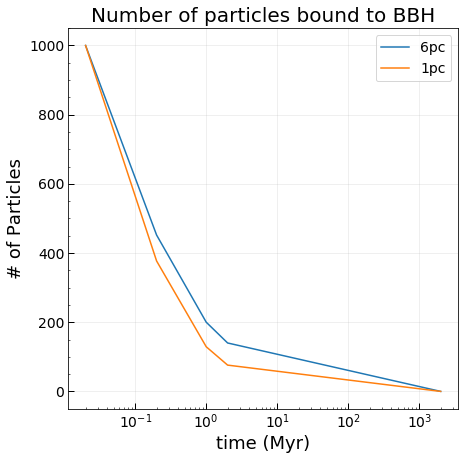

In [150]:
import matplotlib
fig = plt.figure(figsize=(7,7))
params = {'axes.labelsize': 18,
          'axes.titlesize':20, 
          'font.size': 14, 
          'legend.fontsize': 14, 
          'xtick.labelsize': 14, 
          'ytick.labelsize': 14
         }
matplotlib.rcParams.update(params)
plt.semilogx(time, pc6_bound_count,label='6pc')
plt.semilogx(time, pc1_bound_count,label='1pc')
plt.title("Number of particles bound to BBH")
plt.legend()
plt.xlabel('time (Myr)')
plt.ylabel('# of Particles')
plt.minorticks_on()
plt.tick_params(which='minor',direction='in')
plt.tick_params(size = 6, width = 1, direction='in')
plt.grid(alpha=0.25)
plt.savefig('./Images/bound_particle_number.png')
plt.show()